# **Análisis Colisiones de Vehículos en New York**

### **Objetivo del Proyecto:** Predecir la cantidad de víctimas fatales en una colisión vehícular en la ciudad de New York, dadas ciertas condiciones como ubicación y factores contribuyentes a los accidentes viales


---



## **A. Descripción del Dataset**

**ORIGEN DEL DATASET:** Este dataset extraído de [Data.gov](https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes) (nombrado: **Motor_Vehicle_Collisions_-_Crashes.csv** ).

La tabla de accidentes de colisiones de vehículos motorizados, contiene detalles sobre el evento del accidente vial. Cada fila representa un evento de accidente. Las tablas de datos de colisiones de vehículos motorizados contienen información de todas las colisiones de vehículos motorizados reportadas por la policía en la ciudad de Nueva York.

A continuación una breve descripción de las variables:

---
    
| Campo | Descripción | Tipo de dato |
| :--- | :--- |:--- |
|FECHA DEL ACCIDENTE| Fecha de ocurrencia de la colisión| date time|
|TIEMPO DE CHOQUE|Hora de ocurrencia de la colisión|date time|
|CIUDAD|Municipio donde ocurrió la colisión|texto sin formato|
|CÓDIGO POSTAL|Código postal donde ocurrió el incidente|texto sin formato|
|LATITUD|Coordenada de latitud-Sistema de Coordenadas Global (EPSG 4326)|Numérico|
|LONGITUD|Coordenada de longitud-Sistema Global de Coordenadas (EPSG 4326)|Numérico|
|UBICACIÓN|Par de latitud y longitud|texto sin formato|
|NOMBRE DE LA CALLE|Calle en la que ocurrió la colisión.|Texto sin formato|
|NOMBRE DEL CRUCE DE CALLES|Cruce de calles más cercano al lugar de la colisión|Texto sin formato|
|NOMBRE FUERA DE LA CALLE|Dirección si se conoce|Texto sin formato|
|NÚMERO DE PERSONAS HERIDAS|Número de personas heridas en la colisión vial|Numérico|
|NÚMERO DE PERSONAS MUERTAS|Número de personas muertos en la colisión vial|Numérico|
|NÚMERO DE PEATONES HERIDOS|Número de peatones heridos en la colisión vial|Numérico|
|NÚMERO DE PEATONES MUERTOS|Número de peatones muertos en la colisión vial|Numérico|
|NÚMERO DE CICLISTAS HERIDOS|Número de ciclistas heridos en la colisión vial|Numérico|
|NÚMERO DE CICLISTAS MUERTOS|Número de ciclistas muestos en la colisión vial|Numérico|
|NÚMERO DE MOTORISTAS HERIDOS|Número de motociclistas heridos en la colisión vial|Numérico|
|NÚMERO DE MOTORISTAS MUERTOS|Número de motociclistas muertos en la colisión vial|Numérico|
|FACTOR CONTRIBUYENTE VEHÍCULO 1|Factores que contribuyen a la colisión del vehículo designado|Texto sin formato|
|FACTOR CONTRIBUYENTE VEHÍCULO 2|Factores que contribuyen a la colisión del vehículo designado|Texto sin formato|
|FACTOR CONTRIBUYENTE VEHÍCULO 3|Factores que contribuyen a la colisión del vehículo designado|Texto sin formato|
|FACTOR CONTRIBUYENTE VEHÍCULO 4|Factores que contribuyen a la colisión del vehículo designado|Texto sin formato|
|FACTOR CONTRIBUYENTE VEHÍCULO 5|Factores que contribuyen a la colisión del vehículo designado|Texto sin formato|
|ID DE LA COLISIÓN|Código de registro único generado por el sistema|Numérico|
|CÓDIGO DE TIPO DE VEHÍCULO 1|Tipo de vehículo según la categoría de vehículo seleccionada|Texto sin formato|
|CÓDIGO DE TIPO DE VEHÍCULO 2|Tipo de vehículo según la categoría de vehículo seleccionada|Texto sin formato|
|CÓDIGO DE TIPO DE VEHÍCULO 3|Tipo de vehículo según la categoría de vehículo seleccionada|Texto sin formato|
|CÓDIGO DE TIPO DE VEHÍCULO 4|Tipo de vehículo según la categoría de vehículo seleccionada|Texto sin formato|
|CÓDIGO DE TIPO DE VEHÍCULO 5|Tipo de vehículo según la categoría de vehículo seleccionada|Texto sin formato|




---



## **B. Carga de Librerías**


---




Se realiza el cargue de las librerías que se utilizarán en el presente momento evaluativo

In [1]:
#==============================================================================#
# Tratamiento de datos
import numpy as pd
import pandas as pd

#==============================================================================#
# Cargar datos desde Google Drive
from google.colab import drive
from google.colab import auth
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

#==============================================================================#
# Modelado de datos
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#==============================================================================#
# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

#==============================================================================#
# Visualización mapa (longitud, latitud)
from IPython.display import display
import folium

# Configuración warnings
# =============================================================================#
import warnings
warnings.filterwarnings('ignore')



---



## **1. Carga de los datos**

---



La carga de los datos se realiza mediante el uso de modulos de **Google Drive** para **Python**; con el fin de que el usuario pueda obtener acceso al dataset que se almacene en la nube de Drive y no deba estar realizando la descarga y la carga del dataset manualmente al **Google Colab**.

Se opta por realizar una ejecución de este modo, dado el peso del archivo `.csv` es de `442.370.655 bytes` `(442 Mb)`.

In [2]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# How do I import the file now?
downloaded = drive.CreateFile({'id': '1Xn5POKCUa-rgbxytj6eZCc7AlqkJTiwh'})
contenido = downloaded.GetContentString()
print("Descargados {} bytes".format(len(contenido)))

Descargados 442370655 bytes


In [3]:
# Se carga el archivo descargado al entorno de Colab
with open("Motor_Vehicle_Collisions_-_Crashes.csv", "w") as f:
    f.write(contenido)

In [4]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
df.shape

(2086527, 29)

Se toma un fragmento del 0.1% del dataset completo para facilitar la ejecución del entorno y probar los resultados de los diferentes procesos de ejecución del proyecto.

In [5]:
# Leer todo el dataset en fragmentos y tomar una muestra aleatoria
sample_fraction = 0.001  # tomar el 0.1% del dataset
chunksize = 10000  # tamaño de cada fragmento

# Leer el dataset en fragmentos y tomar una muestra aleatoria
df_sample = pd.concat([chunk.sample(frac = sample_fraction) for chunk in pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", chunksize = chunksize)])
# Se visualiza una muestra aleatoria el DataFrame
df_sample.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2278,04/18/2021,8:00,BROOKLYN,11211.0,40.712864,-73.94013,"(40.712864, -73.94013)",POWERS STREET,JUDGE STREET,NaN,...,Unspecified,NaN,NaN,NaN,4408444,Sedan,NaN,NaN,NaN,NaN
4196,09/10/2021,9:33,NaN,NaN,NaN,NaN,NaN,FLATLAND AVENUE,EAST 37 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4457879,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4983,04/21/2021,23:00,BROOKLYN,11210.0,40.631706,-73.94649,"(40.631706, -73.94649)",FLATBUSH AVENUE,AVENUE H,NaN,...,Unspecified,NaN,NaN,NaN,4409414,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9919,05/01/2021,21:25,NaN,NaN,40.575615,-74.16678,"(40.575615, -74.16678)",NaN,NaN,40 YUKON AVENUE,...,Unspecified,NaN,NaN,NaN,4412840,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
5180,04/22/2021,11:32,BROOKLYN,11211.0,40.714730,-73.94208,"(40.71473, -73.94208)",BUSHWICK AVENUE,METROPOLITAN AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4409883,Sedan,NaN,NaN,NaN,NaN




---



Se muestra el tamaño del DataFrame con el objetivo de evaluar la cantidad de instancias que se cargaron del dataset completo.

In [6]:
# Validar la cantidad de datos del data frame
df_sample.shape

(2087, 29)

## **2. Análisis exploratorio de los datos**

---



Se visualizan las variables del DataFrame con el método `.info()`el cual muestra el tipo de datos que se tiene para cada variable, así como la cantidad de valores no nulos en dichas variables

* Para el dataset, se encuentra que se tienen 18 variables `object-("Categóricas")`, 4 variables `float64-(Coma flotante)` y 7 variables `int64-(Enteros)`

In [7]:
# Evaluar los tipos y la cantidad de datos del dataset
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 2278 to 2083368
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     2087 non-null   object 
 1   CRASH TIME                     2087 non-null   object 
 2   BOROUGH                        1411 non-null   object 
 3   ZIP CODE                       1411 non-null   object 
 4   LATITUDE                       1854 non-null   float64
 5   LONGITUDE                      1854 non-null   float64
 6   LOCATION                       1854 non-null   object 
 7   ON STREET NAME                 1654 non-null   object 
 8   CROSS STREET NAME              1301 non-null   object 
 9   OFF STREET NAME                323 non-null    object 
 10  NUMBER OF PERSONS INJURED      2086 non-null   float64
 11  NUMBER OF PERSONS KILLED       2087 non-null   float64
 12  NUMBER OF PEDESTRIANS INJURED  2087 non-null   

Se evalúan los problemas más comunes que se encuentran dentro de un dataset, que son: registros nulos y cadenas de caracteres vacíos ("Espacios"). Y se muestran los valores únicos para cada variable, con el fin de encontrar problemas que requieran tratamiento.

* El data set se encuentra con muchos valores nulos para las variables que involucran más de 3 vehículos en accidentes viales, dado que es más raro que haya una colisión con más de tres vehículos involucrados.


In [8]:
# Validación de estado e integridad de los datos

# Validar la cantidad de NaN por variable
print("Valores nulos por columna:")
print(df_sample.isnull().sum())

# Validar la cantidad de NaN por variable
print("\nValores no nulos por columna:")
print(df_sample.notnull().sum())

# Validar la cantidad de registros con espacios en blanco por variable
print("\nStrings vacíos por columna:")
for column in df_sample.select_dtypes(include=['object']).columns:
    print(f"{column}: {(df_sample[column] == '').sum()}")

# Listar los valores únicos para cada variable
print("\nValores únicos por columna:")
for column in df_sample.select_dtypes(include=['object']).columns:
    print(f"{column}: {df_sample[column].unique()}\n")

Valores nulos por columna:
CRASH DATE                          0
CRASH TIME                          0
BOROUGH                           676
ZIP CODE                          676
LATITUDE                          233
LONGITUDE                         233
LOCATION                          233
ON STREET NAME                    433
CROSS STREET NAME                 786
OFF STREET NAME                  1764
NUMBER OF PERSONS INJURED           1
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1       5
CONTRIBUTING FACTOR VEHICLE 2     306
CONTRIBUTING FACTOR VEHICLE 3    1948
CONTRIBUTING FACTOR VEHICLE 4    2055
CONTRIBUTING FACTOR VEHICLE 5    2079
COLLISION_ID                        0
VEHICLE TYPE CODE 1                14
VEHICLE TYPE CODE 2    

Se validan si existen valores duplicados en el dataset, ya que no aportarían información veráz al modelo, al tener accidentes viales duplicados

In [9]:
# Verificación de registros duplicados en el dataset
duplicated = df_sample.loc[df_sample.duplicated()]
print(f'La cantidad de duplicados en el DataSet es de: {duplicated.shape[0]}')

La cantidad de duplicados en el DataSet es de: 0


In [10]:
# se listan las variables categóricas para evaluar sus valores
catCols = df_sample.select_dtypes(include = ["object", 'category']).columns.tolist()
df_sample[catCols].head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2278,04/18/2021,8:00,BROOKLYN,11211.0,"(40.712864, -73.94013)",POWERS STREET,JUDGE STREET,NaN,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4196,09/10/2021,9:33,NaN,NaN,NaN,FLATLAND AVENUE,EAST 37 STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4983,04/21/2021,23:00,BROOKLYN,11210.0,"(40.631706, -73.94649)",FLATBUSH AVENUE,AVENUE H,NaN,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9919,05/01/2021,21:25,NaN,NaN,"(40.575615, -74.16678)",NaN,NaN,40 YUKON AVENUE,Unsafe Speed,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
5180,04/22/2021,11:32,BROOKLYN,11211.0,"(40.71473, -73.94208)",BUSHWICK AVENUE,METROPOLITAN AVENUE,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN


In [11]:
# se listan las variables numéricas para evaluar sus valores
numCols = df_sample.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
df_sample[numCols].head()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
2278,40.712864,-73.94013,0.0,0.0,0,0,0,0,0,0,4408444
4196,NaN,NaN,1.0,0.0,1,0,0,0,0,0,4457879
4983,40.631706,-73.94649,2.0,0.0,0,0,0,0,2,0,4409414
9919,40.575615,-74.16678,1.0,0.0,0,0,0,0,1,0,4412840
5180,40.714730,-73.94208,0.0,0.0,0,0,0,0,0,0,4409883


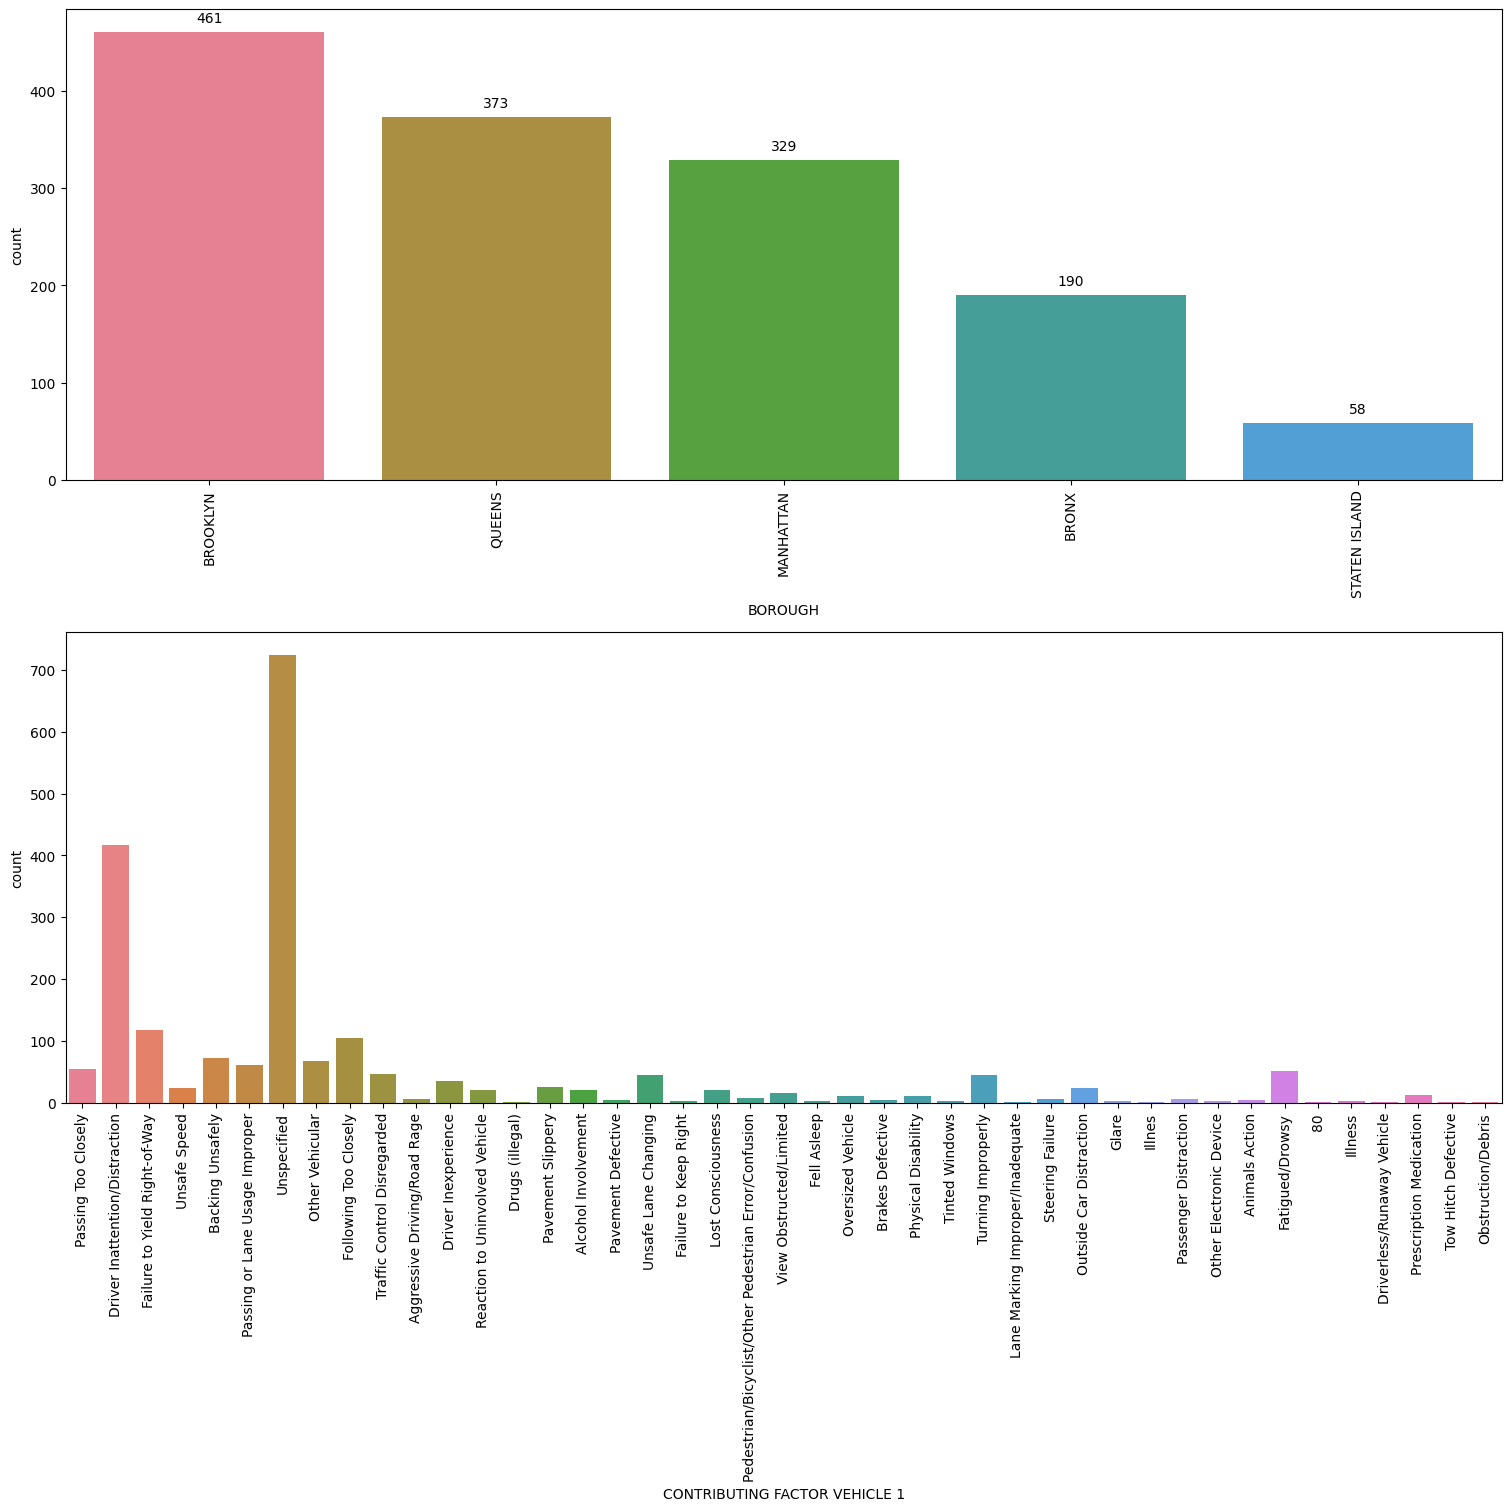

In [12]:
# Se genera una gráfica para evaluar el comportamiento de algunas variables categóricas

# Generar una paleta de colores basada en el número de categorías únicas en tus datos
num_cat_1 = len(df_sample['BOROUGH'].unique())
colors_1 = sns.color_palette("husl", num_cat_1)

num_cat_2 = len(df_sample['CONTRIBUTING FACTOR VEHICLE 1'].unique())
colors_2 = sns.color_palette("husl", num_cat_2)

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(15, 15))

# Gráfico 1
sns.countplot(data = df_sample, x = 'BOROUGH', ax = axs[0], palette = colors_1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, ha = 'center')

# Agregar etiquetas de valores
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

# Gráfico 2
sns.countplot(data = df_sample, x = 'CONTRIBUTING FACTOR VEHICLE 1', ax = axs[1], palette = colors_2)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90, ha = 'center')

# Mostrar la figura
sns.color_palette()
plt.show();



---



## **3. Preparación de los datos**

---



Tomando en consideración los resultados obtenidos en la exploración inicial de los datos se decide realizar los siguientes tratamientos a los datos:

* transformar las columnas `'CRASH DATE'` y `'CRASH TIME'` de `string` a `datetime`.
* Eliminar los espacios en blanco de la variable `'ZIP CODE'` y transformarla en `float64`
* Rellenar los valores faltantes de las variables `'NUMBER OF PERSONS INJURED'` y `'NUMBER OF PERSONS KILLED'` con cero $(0)$ dado que eran muy pocos los valores que se encontraban como `NaN` y dado que el tener los espacios vacíos podía indicar que no se presentaron muertes en esos accidentes viales.
* Por último se transforman las variables anteriores (`'NUMBER OF PERSONS INJURED'` y `'NUMBER OF PERSONS KILLED'`) en `int64` dado que no se pueden presentar muertes de personas en decimales (no existe media muerte)

In [13]:
# Se transforman las columnas ['CRASH DATE'] y ['CRASH TIME'] de str(object) a datetime64[ns]
df_sample['CRASH DATE'] = pd.to_datetime(df_sample['CRASH DATE'])
df_sample['CRASH TIME'] = pd.to_datetime(df_sample['CRASH TIME'])

# =============================================================================#

#Se limpia la variable ZIP CODE para convertirla en una variable numérica
#Se borra todos los valores entre comilla siemple
df_sample['ZIP CODE']= df_sample['ZIP CODE'].str.replace('"','')

# =============================================================================#

#se convierte la variable ['ZIP CODE'] a flotante
df_sample['ZIP CODE'] = pd.to_numeric(df_sample['ZIP CODE'], errors = 'coerce').astype(float)

# se convierte las variables ['NUMBER OF PERSONS INJURED'] y ['NUMBER OF PERSONS KILLED'] a tipo entero
# Se rellenan los NaN de Número de personas muertas y lesionadas con 0 dado que igualmente tener los NaN no aportan al modelo y son pocos los valores nulos.
df_sample['NUMBER OF PERSONS INJURED'] = df_sample['NUMBER OF PERSONS INJURED'].fillna(0).astype(int)
df_sample['NUMBER OF PERSONS KILLED'] = df_sample['NUMBER OF PERSONS KILLED'].fillna(0).astype(int)

Se valida nuevamente mediante el método `.info()` que se hayan realizado adecuadamente los cambios en los tipos de las variables.

In [14]:
# Se evaluan los tipos de datos del dataset nuevamente para validar los cambios realizados
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 2278 to 2083368
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE                     2087 non-null   datetime64[ns]
 1   CRASH TIME                     2087 non-null   datetime64[ns]
 2   BOROUGH                        1411 non-null   object        
 3   ZIP CODE                       210 non-null    float64       
 4   LATITUDE                       1854 non-null   float64       
 5   LONGITUDE                      1854 non-null   float64       
 6   LOCATION                       1854 non-null   object        
 7   ON STREET NAME                 1654 non-null   object        
 8   CROSS STREET NAME              1301 non-null   object        
 9   OFF STREET NAME                323 non-null    object        
 10  NUMBER OF PERSONS INJURED      2087 non-null   int64         
 11  NUMBER OF PERSON

Se evalúan las variables numéricas del DataFrame que se van a escalar:

* Se deciden eliminar del escalado las variables `'LATITUDE'`, `'LONGITUDE'` y `'COLLISION_ID'`, dado que estas variables son valores que no representan nada si se escalan y la `'LATITUDE'`y la `'LONGITUDE'` se utilizarán para realizar otros análisis que se verán más adelante en el presente Notebook.

Se crean la variable predictora $(X)$ y la variable respuesta $(y)$ para realizar posteriormente la división de los datos.

In [15]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = df_sample.drop(columns = ['NUMBER OF PERSONS KILLED'])
y = df_sample['NUMBER OF PERSONS KILLED']

Se escalan los datos numéricos utilizando la `función MinMaxScaler()`

In [16]:
# Escalar Variables númericas

#Se crea una lista con todas las varibles de entrada
list_borrar = ['NUMBER OF PERSONS KILLED', 'LATITUDE', 'LONGITUDE', 'COLLISION_ID']
vDep = list(df_sample.columns)
vDep = list(set(vDep)-set(list_borrar))

# Generación de listado de las variables numéricas
num_vars = list(set(numCols) & set(vDep))

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X[num_vars] = scaler.fit_transform(X[num_vars])
#X_test[num_vars] = scaler.transform(X_test[num_vars])

X[num_vars].head()

,NUMBER OF CYCLIST INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF MOTORIST KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF PERSONS INJURED,NUMBER OF MOTORIST INJURED
2278,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4196,0.0,0.0,0.5,0.0,0.0,0.2,0.0
4983,0.0,0.0,0.0,0.0,0.0,0.4,0.4
9919,0.0,0.0,0.0,0.0,0.0,0.2,0.2
5180,0.0,0.0,0.0,0.0,0.0,0.0,0.0




---



## **4. Creación de datasets** `(Entrenamiento y Testeo)`



---



Se utiliza la librería `sklearn.model_selection` para dividir los datos en partes de Entrenamiento y Testeo para la variable predictora $(X)$ como para la variable respuesta $(y)$.

* Dada la cantidad de los datos se utiliza una división de 70% para `train`y 30% para `test`
* Se utiliza un random_state para que no haya variación entre cada ejecución del Notebook y se pueda mantener el valor de la respuesta del modelo
* Se utiliza una mezcla aleatoria inicial para garantizar que si existe un ordenamiento de los datos por alguna razón, estos no afecten las divisiones de `train` y `test`

In [17]:
# Se dividen los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    test_size    = 0.3,
                                                    random_state = 42,
                                                    shuffle      = True)

In [18]:
X_train

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
270766,2020-02-02,2024-05-17 22:35:00,MANHATTAN,NaN,NaN,NaN,NaN,MACOMBS DAM BRIDGE,WEST 154 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4282668,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1174707,2016-02-16,2024-05-17 19:45:00,BROOKLYN,NaN,40.722727,-73.947476,"(40.7227274, -73.9474758)",DRIGGS AVENUE,GRAHAM AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3389651,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN
103508,2021-11-28,2024-05-17 09:39:00,QUEENS,NaN,40.711220,-73.780910,"(40.71122, -73.78091)",90 AVENUE,181 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4481932,Sedan,Sedan,NaN,NaN,NaN
2028500,2023-08-23,2024-05-17 17:50:00,QUEENS,NaN,40.668327,-73.796270,"(40.668327, -73.79627)",143 STREET,135 AVENUE,NaN,...,Unspecified,Unspecified,Unspecified,NaN,4657550,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
839618,2017-07-19,2024-05-17 15:00:00,QUEENS,NaN,40.754820,-73.844990,"(40.75482, -73.84499)",NaN,NaN,123-01 ROOSEVELT AVENUE,...,Unspecified,NaN,NaN,NaN,3715188,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635403,2013-12-24,2024-05-17 22:20:00,BROOKLYN,11230.0,40.624171,-73.970472,"(40.6241708, -73.9704715)",AVENUE J,OCEAN PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,134358,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1098600,2016-06-07,2024-05-17 14:25:00,QUEENS,NaN,40.721725,-73.758490,"(40.721725, -73.75849)",NaN,NaN,207-16 HILLSIDE AVENUE,...,NaN,NaN,NaN,NaN,3458737,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1137585,2016-04-04,2024-05-17 15:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EAST 86 STREET,...,Unspecified,NaN,NaN,NaN,3408742,4 dr sedan,NaN,NaN,NaN,NaN
1296405,2015-08-04,2024-05-17 05:22:00,MANHATTAN,NaN,40.792752,-73.971314,"(40.7927515, -73.971314)",WEST 94 STREET,AMSTERDAM AVENUE,NaN,...,Other Vehicular,NaN,NaN,NaN,3270837,LIVERY VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN




---



## **5. Análisis descriptivo avanzado**



---



Se realiza un análisis gráfico de algunas de las variables categóricas con el fin de evaluar el comportamiento de los datos.

* Las ciudades que más cuentan con registros de accidentes son Brooklin y Queens
* Para el análisis de los factores que contribuyen a la colisión está como mayoritario el registro `no especificado` que no aporta información al modelo, pero siguen los valores de `desatención/distracción del conductor`, `no ceder el paso` y `no respetar la distancia entre vehículos`. Que si pueden aportar más al análisis de la predicción.

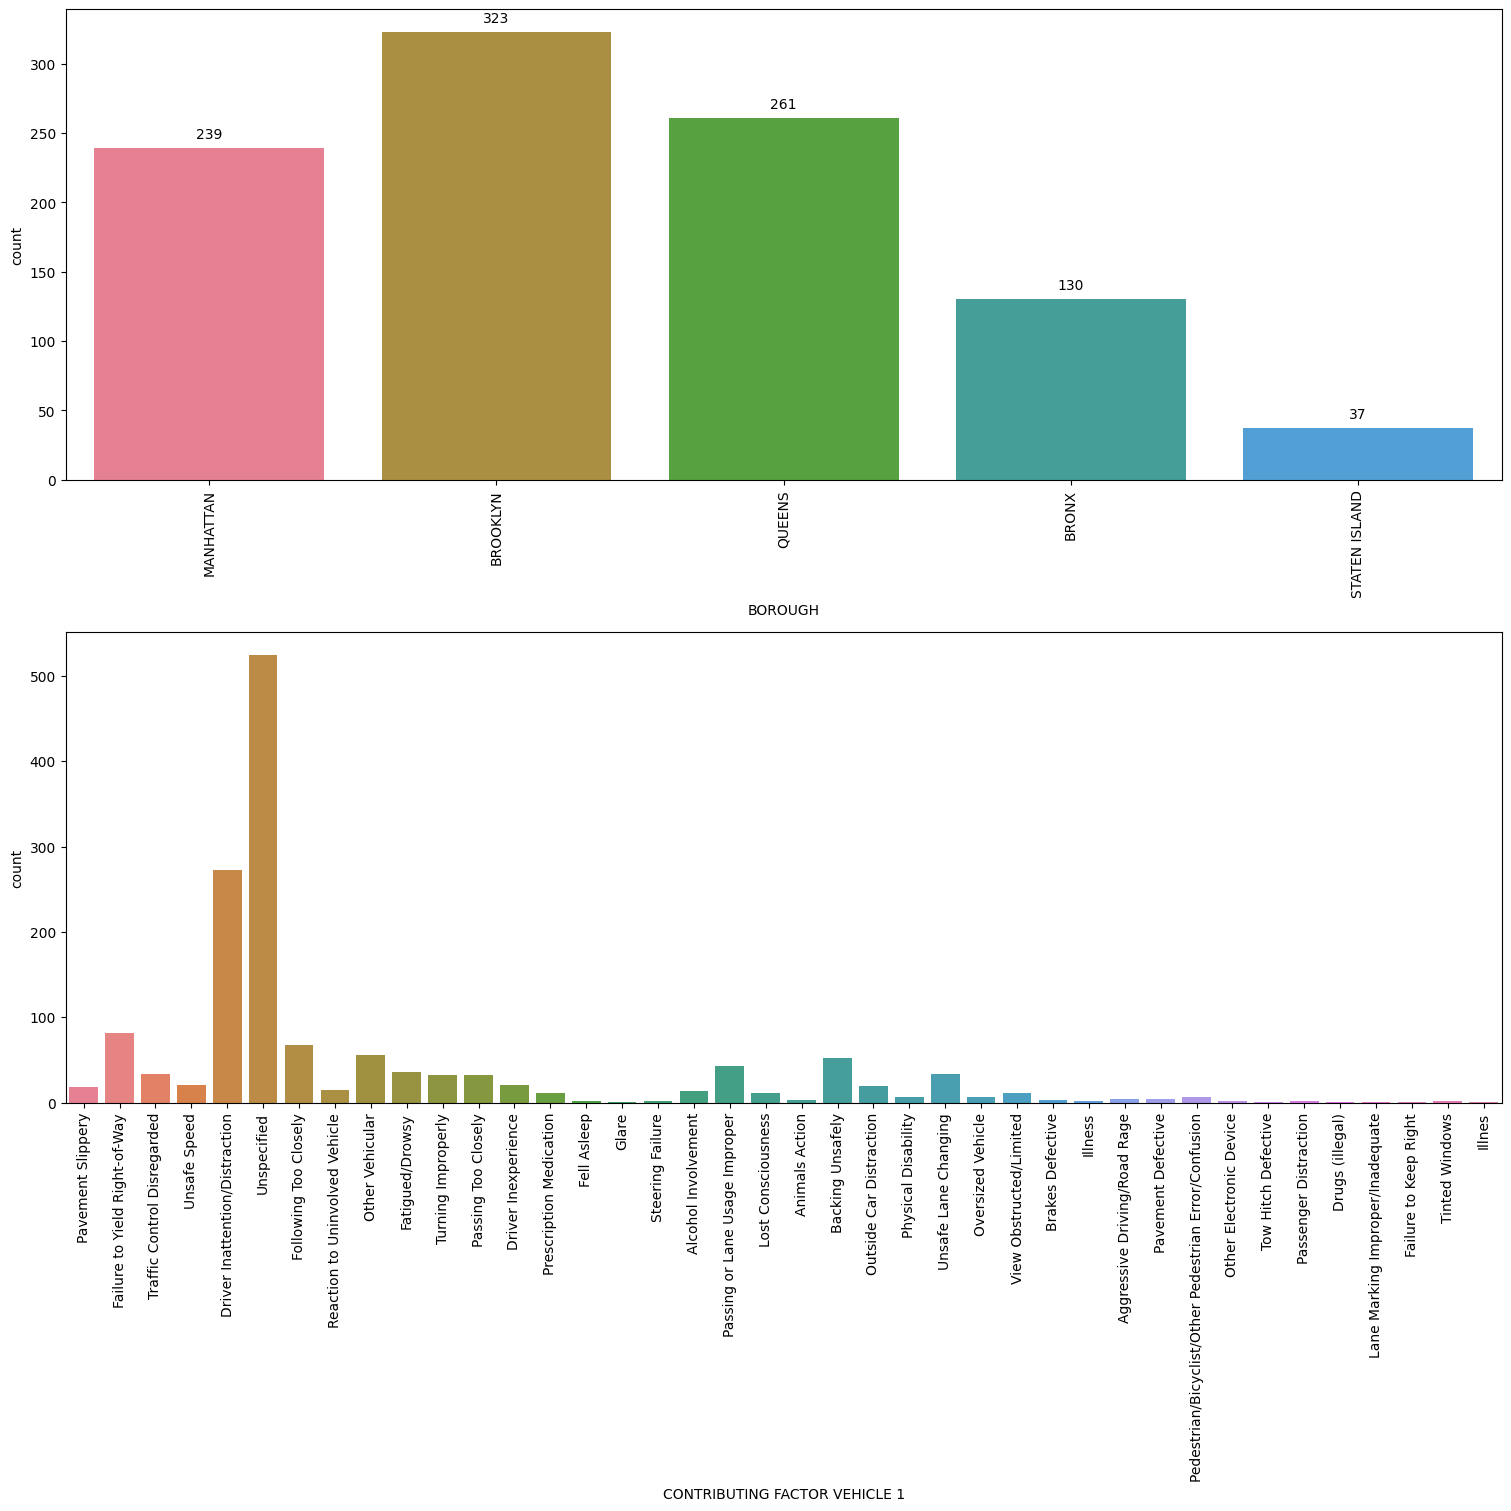

In [19]:
# Se genera una gráfica para evaluar el comportamiento de algunas variables categóricas

# Generar una paleta de colores basada en el número de categorías únicas en tus datos
num_cat_1 = len(X_train['BOROUGH'].unique())
colors_1 = sns.color_palette("husl", num_cat_1)

num_cat_2 = len(X_train['CONTRIBUTING FACTOR VEHICLE 1'].unique())
colors_2 = sns.color_palette("husl", num_cat_2)

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(15, 15))

# Gráfico 1
sns.countplot(data = X_train, x = 'BOROUGH', ax = axs[0], palette = colors_1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, ha = 'center')

# Agregar etiquetas de valores
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

# Gráfico 2
sns.countplot(data = X_train, x = 'CONTRIBUTING FACTOR VEHICLE 1', ax = axs[1], palette = colors_2)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90, ha = 'center')

# Mostrar la figura
sns.color_palette()
plt.show();

Se evalúa el comportamiento de las variables numéricas y se obtiene el siguiente resultado:

* Al parecer existe una aparente correlación positiva entre las variables `'NUMBER OF MOTORIST INJURED'` y `'NUMBER OF PERSONS INJURED'` lo que se podría explicar dado que un accidente en motocicleta hay una muy alta probabilidad de que el conductor salga lastimado, lo que no se ve por ejemplo con vehículos con mayor protección tales como carros, camionestas, buses, etc.
* Las demás variables parecen no tener un comportamiento relacional para el modelo, dado que no presentan tendencias identificables a simple vista.

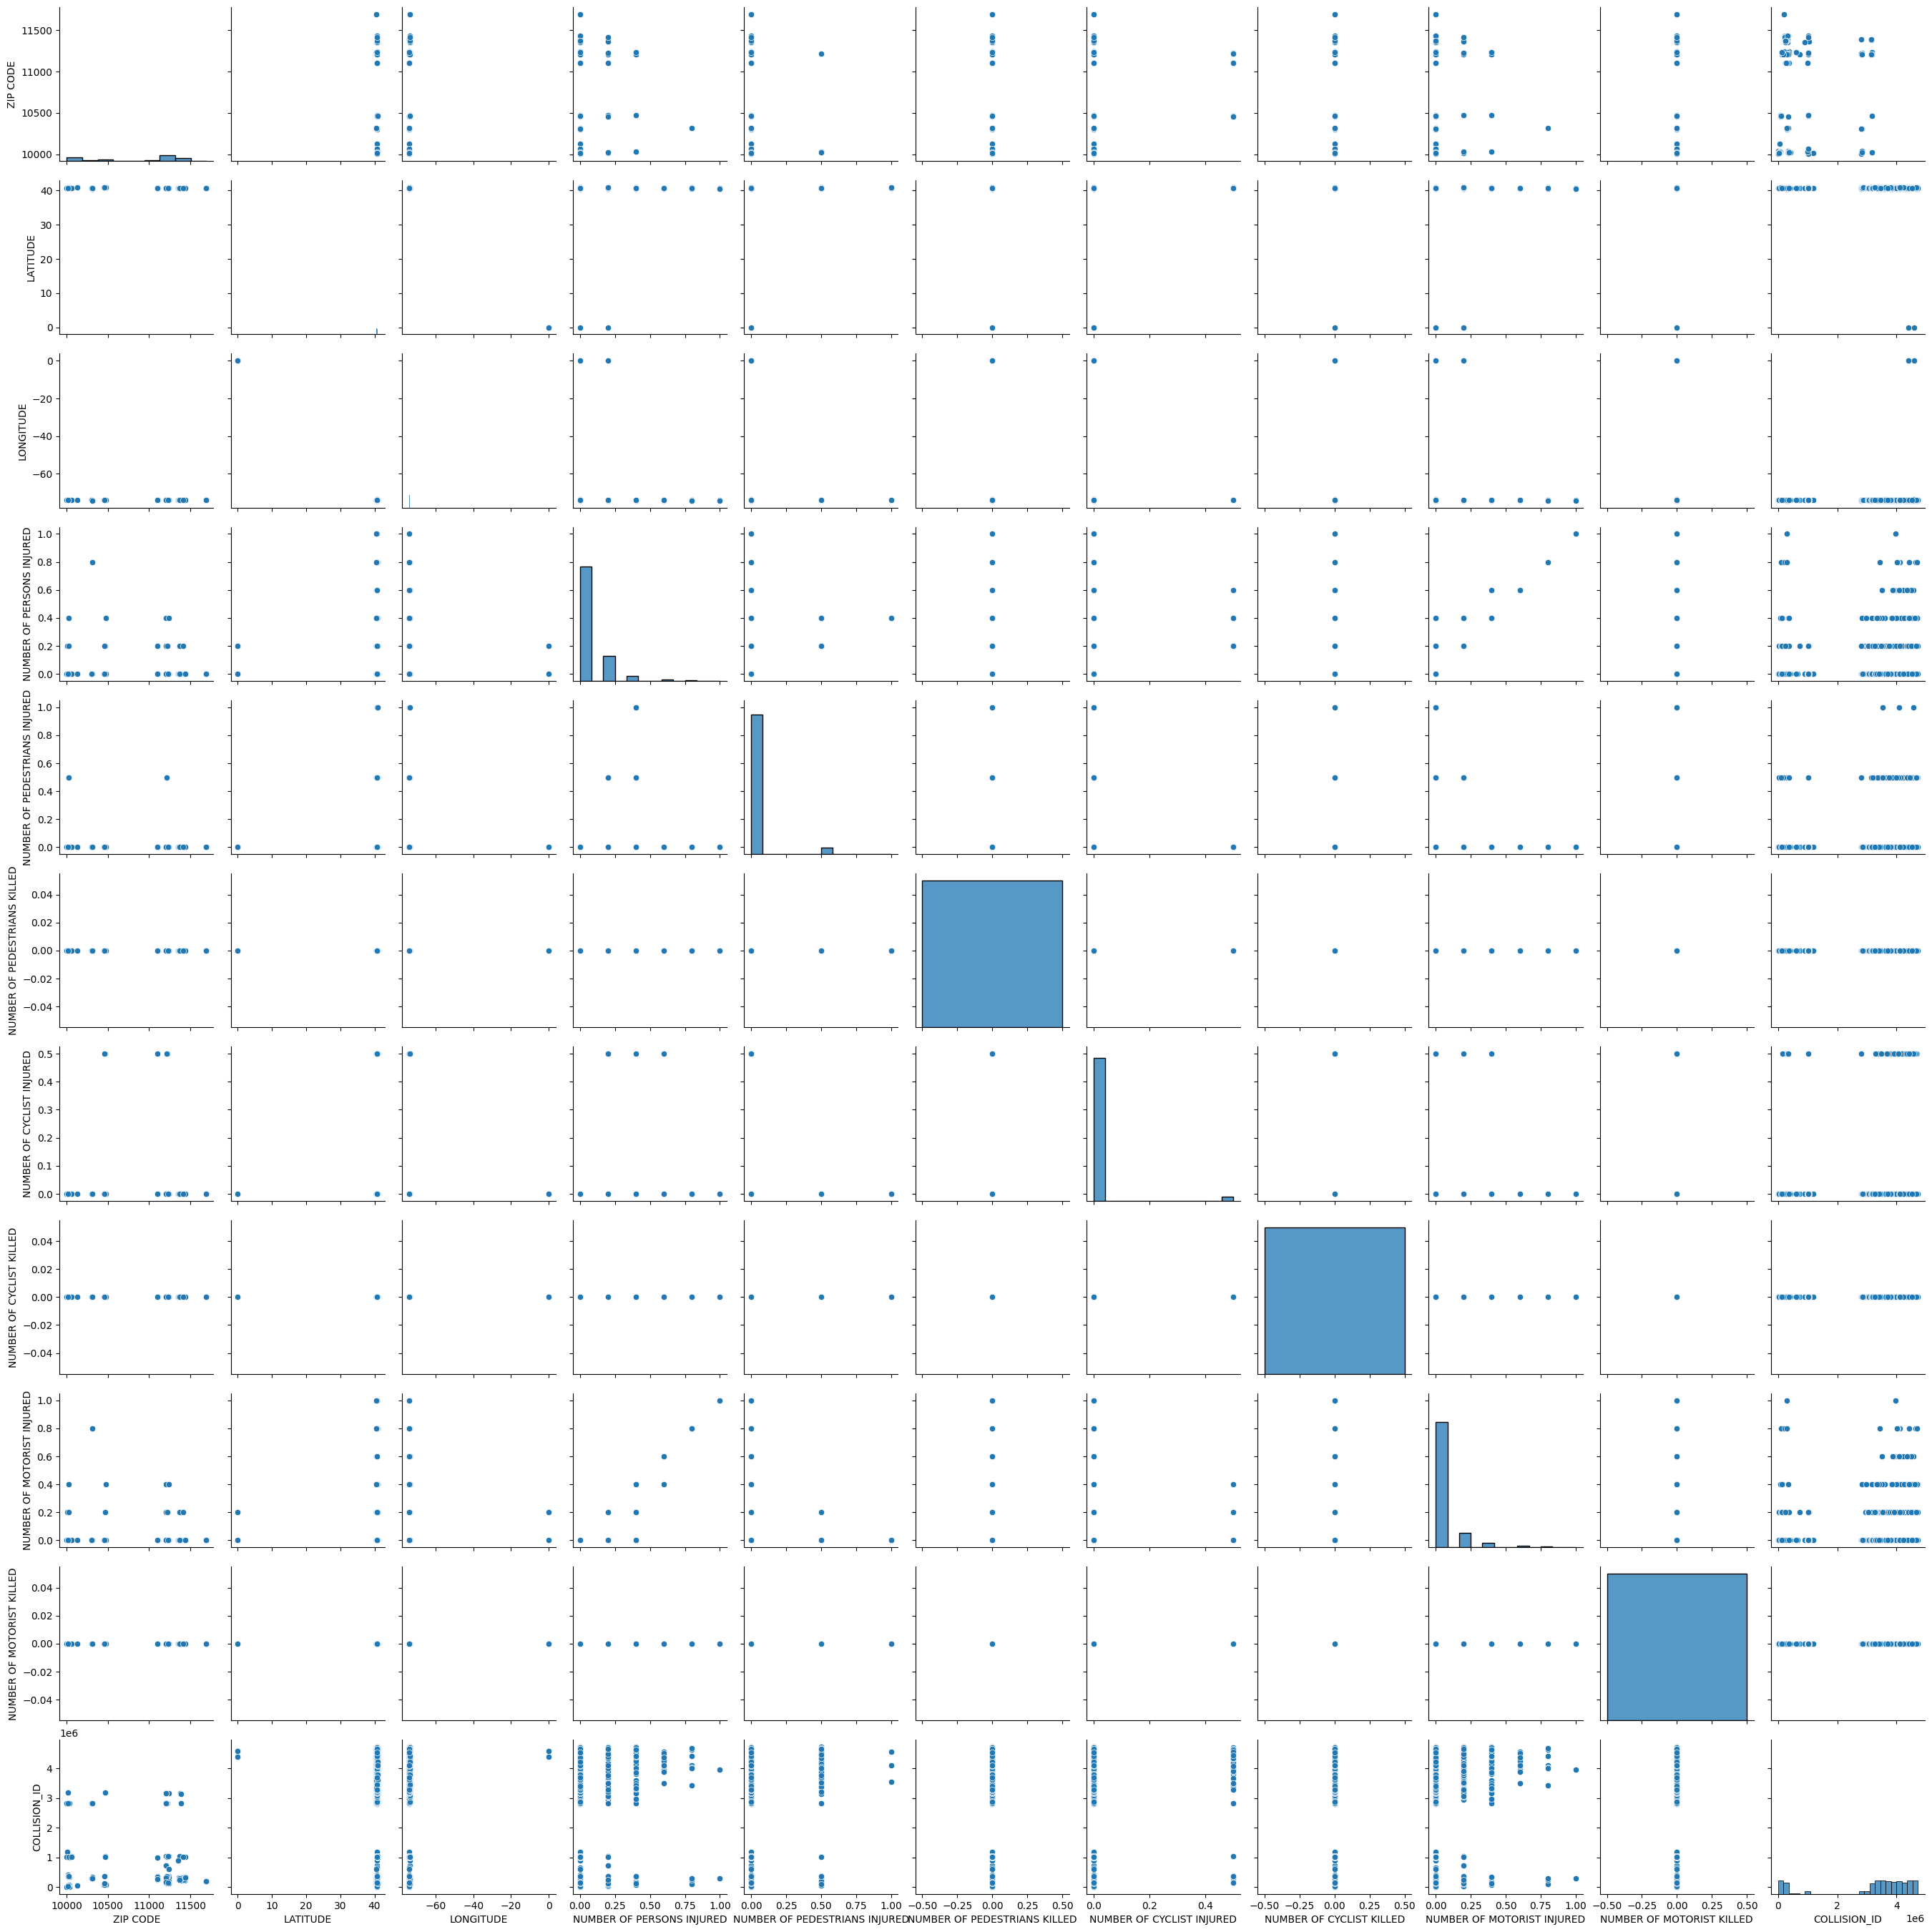

In [20]:
# Se evalua el comportamiento de las variables numéricas
sns.pairplot(X_train)
plt.show();

Al realizar una matriz de correlación entre las variables numéricas, se logra identificar que la aparente correlación que se observó previamente entre las variables `'NUMBER OF MOTORIST INJURED'` y `'NUMBER OF PERSONS INJURED'` si tiene un comportamiento lineal positivo dada la correlación de un 88% entre ambas variables.

Y cómo se había observado en la gráfica anterior las demás variables no aparentan tener un comportamiento correlacionado entre sí dado el bajo porcentaje que presentan.

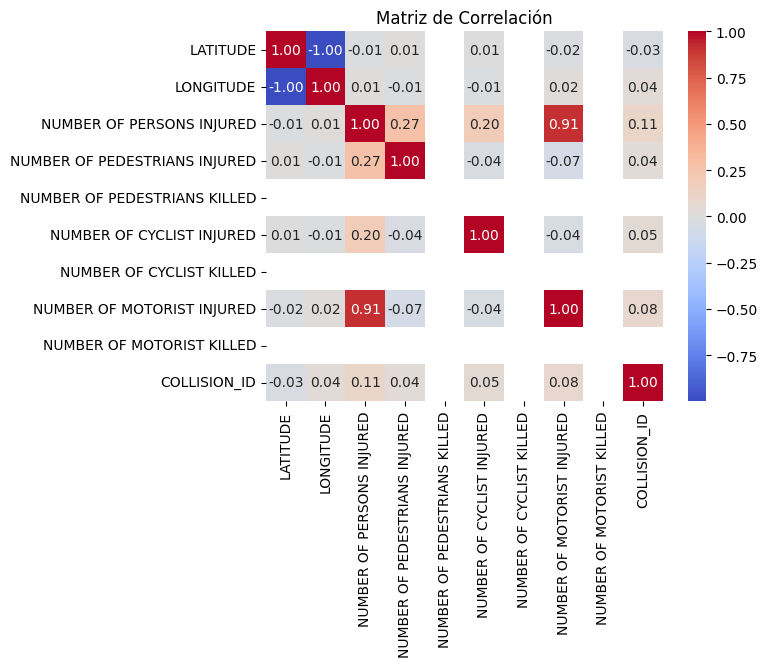

In [21]:
# Se valida si las variables tienen algún tipo de correlación

df_sample_dropped = X_train.drop(df_sample[catCols], axis=1)

sns.heatmap(df_sample_dropped.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()



---



### **5.1 Análisis Adicional**



---



Dado que se contaba con variables de posicionamiento espacial, se optó por realizar un análisis del comportamiento de la variable respuesta `'NUMBER OF PERSONS'` con el fin de validar si existía un patrón de comportamiento de atropellamientos mortales en la ciudad de Nueva York.

Con los datos que se tomaron para este ejemplo, se ve que los accidentes viales se centra un poco más en el área de Manhattan y central park. Pero sería necesario analizar este comportamiento con los datos completos para validar la hipótesis, aunque podría ser un comportamiento acertado dada la alta afluencia de personas y vehículos en dicha área.

In [22]:
# Leer todo el dataset en fragmentos y tomar una muestra aleatoria
sample_fraction_map = 0.0002  # tomar el 0.02% del dataset
chunksize_map = 10000  # tamaño de cada fragmento

# Leer el dataset en fragmentos y tomar una muestra aleatoria
df_sample_map = pd.concat([chunk.sample(frac = sample_fraction_map) for chunk in pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", chunksize = chunksize_map)])
df_sample_map.shape


(417, 29)

In [23]:
# Se crea un DataFrame en el que las variables de latitud y longitud no son NaN
df_valid_coords = df_sample_map.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Crear un mapa
mapa = folium.Map(location=[df_valid_coords['LATITUDE'].mean(), df_valid_coords['LONGITUDE'].mean()], zoom_start = 11)

# Agregar marcadores para cada fila en el DataFrame
for index, row in df_valid_coords.iterrows():
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup = f"Personas Fallecidas: ${row['NUMBER OF PERSONS KILLED']}", tooltip = f"Persona Fallecida en Accidente Vial").add_to(mapa)

# Mostrar el mapa
mapa.save('mapa.html')  # Guardar el mapa como un archivo HTML
display(mapa)



---



## **6. Referencias**

* [Base de Datos: *Motor Vehicle Collisions - Crashes*](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data)
*  [Librería Scikit-Learn: sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

* [Notebooks](https://colab.research.google.com/drive/1-dI12bCSAgWu6lfzVkViedtJva21fQK7)
Autor: [David Villanueva Valdes](mailto:david.villanueva@udea.edu.co)
    * ACT02 Towards Data Monography.ipynb

* [Notebooks](https://drive.google.com/drive/folders/1jmjSNu9xSOjExauNBp-no3wEep0OtQLl)
Autor: [Jorge Bedoya](mailto:jabedoyap79@gmail.com)
    * 00_PreparaciónDataset01Regresion.ipynb
    * 02_RegresionLineal.ipynb
    * 03_RegresionLineal(2da Parte).ipynb

   